In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import joblib

In [2]:
test_1 = pd.read_csv("/Users/saumit/ApnaGuide/Project 2/PS-4-EngineFaultDetection/test_FD001.txt",sep=" ",header=None)
train_1 = pd.read_csv("/Users/saumit/ApnaGuide/Project 2/PS-4-EngineFaultDetection/train_FD001.txt",sep=" ",header=None)
test_1.drop(columns=[26,27],inplace=True)
train_1.drop(columns=[26,27],inplace=True)


print(f"Shape of test_1: {test_1.shape}")
print(f"Shape of train_1: {train_1.shape}")



Shape of test_1: (13096, 26)
Shape of train_1: (20631, 26)


In [27]:
RUL_1 = pd.read_csv("/Users/saumit/ApnaGuide/Project 2/PS-4-EngineFaultDetection/RUL_FD001.txt", header=None)


In [14]:
#Adding sensors name and unit measure from the paper
columns = ['unit_number','time_(cycles)','operational_setting_1','operational_setting_2','operational_setting_3','T2_Total_temperature_at_fan_inlet_(°R)','T24_Total_temperature_at_LPC_outlet_(°R)','T30_Total_temperature_at_HPC_outlet_(°R)','T50_Total_temperature_at_LPT_outlet_(°R)','P2_Pressure_at_fan_inlet_(psia)','P15_Total_pressure_in_bypass-duct_(psia)','P30_Total_pressure_at_HPC_outlet_(psia)','Nf_Physical_fan_speed_(rpm)',
           'Nc_Physical_core_speed_(rpm)','epr_Engine_pressure_ratio_(P50/P2)','Ps30_Static_pressure_at_HPC_outlet_(psia)','phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)','NRf_Corrected_fan_speed_(rpm)','NRc_Corrected_core_speed_(rpm)','BPR_Bypass_Ratio','farB_Burner_fuel-air_ratio','htBleed_Bleed_Enthalpy','Nf_dmd_Demanded_fan_speed_(rpm)','PCNfR_dmd_Demanded_corrected_fan_speed_(rpm)','W31_HPT_coolant_bleed_(lbm/s)','W32_LPT_coolant_bleed_(lbm/s)']

In [15]:
test_1.columns=columns
train_1.columns=columns

In [16]:
train_1

unit_number  time_(cycles)  operational_setting_1  \
0                1              1                -0.0007   
1                1              2                 0.0019   
2                1              3                -0.0043   
3                1              4                 0.0007   
4                1              5                -0.0019   
...            ...            ...                    ...   
20626          100            196                -0.0004   
20627          100            197                -0.0016   
20628          100            198                 0.0004   
20629          100            199                -0.0011   
20630          100            200                -0.0032   

       operational_setting_2  operational_setting_3  \
0                    -0.0004                  100.0   
1                    -0.0003                  100.0   
2                     0.0003                  100.0   
3                     0.0000                  100.0   
4                    -0.0002                  100.0   
...                      ...                    ...   
20626                -0.0003                  100.0   
20627                -0.0005                  100.0   
20628                 0.0000                  100.0   
20629                 0.0003                  100.0   
20630                -0.0005                  100.0   

       T2_Total_temperature_at_fan_inlet_(°R)  \
0                                      518.67   
1                                      518.67   
2                                      518.67   
3                                      518.67   
4                                      518.67   
...                                       ...   
20626                                  518.67   
20627                                  518.67   
20628                                  518.67   
20629                                  518.67   
20630                                  518.67   

       T24_Total_temperature_at_LPC_outlet_(°R)  \
0                                        641.82   
1                                        642.15   
2                                        642.35   
3                                        642.35   
4                                        642.37   
...                                         ...   
20626                                    643.49   
20627                                    643.54   
20628                                    643.42   
20629                                    643.23   
20630                                    643.85   

       T30_Total_temperature_at_HPC_outlet_(°R)  \
0                                       1589.70   
1                                       1591.82   
2                                       1587.99   
3                                       1582.79   
4                                       1582.85   
...                                         ...   
20626                                   1597.98   
20627                                   1604.50   
20628                                   1602.46   
20629                                   1605.26   
20630                                   1600.38   

       T50_Total_temperature_at_LPT_outlet_(°R)  \
0                                       1400.60   
1                                       1403.14   
2                                       1404.20   
3                                       1401.87   
4                                       1406.22   
...                                         ...   
20626                                   1428.63   
20627                                   1433.58   
20628                                   1428.18   
20629                                   1426.53   
20630                                   1432.14   

       P2_Pressure_at_fan_inlet_(psia)  ...  \
0                                14.62  ...   
1                                14.62  ...   
2                                14.62  ...   
3        

In [17]:
test_1

unit_number  time_(cycles)  operational_setting_1  \
0                1              1                 0.0023   
1                1              2                -0.0027   
2                1              3                 0.0003   
3                1              4                 0.0042   
4                1              5                 0.0014   
...            ...            ...                    ...   
13091          100            194                 0.0049   
13092          100            195                -0.0011   
13093          100            196                -0.0006   
13094          100            197                -0.0038   
13095          100            198                 0.0013   

       operational_setting_2  operational_setting_3  \
0                     0.0003                  100.0   
1                    -0.0003                  100.0   
2                     0.0001                  100.0   
3                     0.0000                  100.0   
4                     0.0000                  100.0   
...                      ...                    ...   
13091                 0.0000                  100.0   
13092                -0.0001                  100.0   
13093                -0.0003                  100.0   
13094                 0.0001                  100.0   
13095                 0.0003                  100.0   

       T2_Total_temperature_at_fan_inlet_(°R)  \
0                                      518.67   
1                                      518.67   
2                                      518.67   
3                                      518.67   
4                                      518.67   
...                                       ...   
13091                                  518.67   
13092                                  518.67   
13093                                  518.67   
13094                                  518.67   
13095                                  518.67   

       T24_Total_temperature_at_LPC_outlet_(°R)  \
0                                        643.02   
1                                        641.71   
2                                        642.46   
3                                        642.44   
4                                        642.51   
...                                         ...   
13091                                    643.24   
13092                                    643.22   
13093                                    643.44   
13094                                    643.26   
13095                                    642.95   

       T30_Total_temperature_at_HPC_outlet_(°R)  \
0                                       1585.29   
1                                       1588.45   
2                                       1586.94   
3                                       1584.12   
4                                       1587.19   
...                                         ...   
13091                                   1599.45   
13092                                   1595.69   
13093                                   1593.15   
13094                                   1594.99   
13095                                   1601.62   

       T50_Total_temperature_at_LPT_outlet_(°R)  \
0                                       1398.21   
1                                       1395.42   
2                                       1401.34   
3                                       1406.42   
4                                       1401.92   
...                                         ...   
13091                                   1415.79   
13092                                   1422.05   
13093                                   1406.82   
13094                                   1419.36   
13095                                   1424.99   

       P2_Pressure_at_fan_inlet_(psia)  ...  \
0                                14.62  ...   
1                                14.62  ...   
2                                14.62  ...   
3        

In [18]:
train_1.describe()


unit_number  time_(cycles)  operational_setting_1  \
count  20631.000000   20631.000000           20631.000000   
mean      51.506568     108.807862              -0.000009   
std       29.227633      68.880990               0.002187   
min        1.000000       1.000000              -0.008700   
25%       26.000000      52.000000              -0.001500   
50%       52.000000     104.000000               0.000000   
75%       77.000000     156.000000               0.001500   
max      100.000000     362.000000               0.008700   

       operational_setting_2  operational_setting_3  \
count           20631.000000                20631.0   
mean                0.000002                  100.0   
std                 0.000293                    0.0   
min                -0.000600                  100.0   
25%                -0.000200                  100.0   
50%                 0.000000                  100.0   
75%                 0.000300                  100.0   
max                 0.000600                  100.0   

       T2_Total_temperature_at_fan_inlet_(°R)  \
count                                20631.00   
mean                                   518.67   
std                                      0.00   
min                                    518.67   
25%                                    518.67   
50%                                    518.67   
75%                                    518.67   
max                                    518.67   

       T24_Total_temperature_at_LPC_outlet_(°R)  \
count                              20631.000000   
mean                                 642.680934   
std                                    0.500053   
min                                  641.210000   
25%                                  642.325000   
50%                                  642.640000   
75%                                  643.000000   
max                                  644.530000   

       T30_Total_temperature_at_HPC_outlet_(°R)  \
count                              20631.000000   
mean                                1590.523119   
std                                    6.131150   
min                                 1571.040000   
25%                                 1586.260000   
50%                                 1590.100000   
75%                                 1594.380000   
max                                 1616.910000   

       T50_Total_temperature_at_LPT_outlet_(°R)  \
count                              20631.000000   
mean                                1408.933782   
std                                    9.000605   
min                                 1382.250000   
25%                                 1402.360000   
50%                                 1408.040000   
75%                                 1414.555000   
max                                 1441.490000   

       P2_Pressure_at_fan_inlet_(psia)  ...  \
count                     2.063100e+04  ...   
mean                      1.462000e+01  ...   
std                       1.776400e-15  ...   
min                       1.462000e+01  ...   
25%                       1.462000e+01  ...   
50%                       1.462000e+01  ...   
75%                       1.462000e+01  ...   
max                       1.462000e+01  ...   

       phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)  \
count                              20631.000000   
mean                                 521.413470   
std                                    0.737553   
min                                  518.690000   
25%                                  520.960000   
50%                                  521.480000   
75%                                  521.950000   
max                                  523.380000   

       NRf_Corrected_fan_speed_(rpm)  NRc_Corrected_core_speed_(rpm)  \
count                   20631.000000                    20631.000000   
mean                     2388.096152                     8143.752722   
std                         0.071919    

In [19]:
test_1.describe()

unit_number  time_(cycles)  operational_setting_1  \
count  13096.000000   13096.000000           13096.000000   
mean      51.543907      76.836515              -0.000011   
std       28.289423      53.057749               0.002203   
min        1.000000       1.000000              -0.008200   
25%       28.000000      33.000000              -0.001500   
50%       52.000000      69.000000              -0.000000   
75%       76.000000     113.000000               0.001500   
max      100.000000     303.000000               0.007800   

       operational_setting_2  operational_setting_3  \
count           13096.000000                13096.0   
mean                0.000004                  100.0   
std                 0.000294                    0.0   
min                -0.000600                  100.0   
25%                -0.000200                  100.0   
50%                -0.000000                  100.0   
75%                 0.000300                  100.0   
max                 0.000700                  100.0   

       T2_Total_temperature_at_fan_inlet_(°R)  \
count                                13096.00   
mean                                   518.67   
std                                      0.00   
min                                    518.67   
25%                                    518.67   
50%                                    518.67   
75%                                    518.67   
max                                    518.67   

       T24_Total_temperature_at_LPC_outlet_(°R)  \
count                              13096.000000   
mean                                 642.475088   
std                                    0.400899   
min                                  641.130000   
25%                                  642.197500   
50%                                  642.460000   
75%                                  642.740000   
max                                  644.300000   

       T30_Total_temperature_at_HPC_outlet_(°R)  \
count                              13096.000000   
mean                                1588.099204   
std                                    5.003274   
min                                 1569.040000   
25%                                 1584.600000   
50%                                 1587.990000   
75%                                 1591.362500   
max                                 1607.550000   

       T50_Total_temperature_at_LPT_outlet_(°R)  \
count                              13096.000000   
mean                                1404.735362   
std                                    6.688309   
min                                 1384.390000   
25%                                 1399.950000   
50%                                 1404.440000   
75%                                 1409.050000   
max                                 1433.360000   

       P2_Pressure_at_fan_inlet_(psia)  ...  \
count                     1.309600e+04  ...   
mean                      1.462000e+01  ...   
std                       1.776425e-15  ...   
min                       1.462000e+01  ...   
25%                       1.462000e+01  ...   
50%                       1.462000e+01  ...   
75%                       1.462000e+01  ...   
max                       1.462000e+01  ...   

       phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)  \
count                              13096.000000   
mean                                 521.747724   
std                                    0.559627   
min                                  519.380000   
25%                                  521.380000   
50%                                  521.780000   
75%                                  522.150000   
max                                  523.760000   

       NRf_Corrected_fan_speed_(rpm)  NRc_Corrected_core_speed_(rpm)  \
count                   13096.000000                    13096.000000   
mean                     2388.071025                     8138.947817   
std                         0.056934    

In [20]:
train_1.isnull().sum()


unit_number                                     0
time_(cycles)                                   0
operational_setting_1                           0
operational_setting_2                           0
operational_setting_3                           0
T2_Total_temperature_at_fan_inlet_(°R)          0
T24_Total_temperature_at_LPC_outlet_(°R)        0
T30_Total_temperature_at_HPC_outlet_(°R)        0
T50_Total_temperature_at_LPT_outlet_(°R)        0
P2_Pressure_at_fan_inlet_(psia)                 0
P15_Total_pressure_in_bypass-duct_(psia)        0
P30_Total_pressure_at_HPC_outlet_(psia)         0
Nf_Physical_fan_speed_(rpm)                     0
Nc_Physical_core_speed_(rpm)                    0
epr_Engine_pressure_ratio_(P50/P2)              0
Ps30_Static_pressure_at_HPC_outlet_(psia)       0
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)        0
NRf_Corrected_fan_speed_(rpm)                   0
NRc_Corrected_core_speed_(rpm)                  0
BPR_Bypass_Ratio                                0


In [21]:
test_1.nunique()


unit_number                                      100
time_(cycles)                                    303
operational_setting_1                            150
operational_setting_2                             14
operational_setting_3                              1
T2_Total_temperature_at_fan_inlet_(°R)             1
T24_Total_temperature_at_LPC_outlet_(°R)         262
T30_Total_temperature_at_HPC_outlet_(°R)        2361
T50_Total_temperature_at_LPT_outlet_(°R)        2954
P2_Pressure_at_fan_inlet_(psia)                    1
P15_Total_pressure_in_bypass-duct_(psia)           2
P30_Total_pressure_at_HPC_outlet_(psia)          415
Nf_Physical_fan_speed_(rpm)                       41
Nc_Physical_core_speed_(rpm)                    4047
epr_Engine_pressure_ratio_(P50/P2)                 1
Ps30_Static_pressure_at_HPC_outlet_(psia)        136
phi_Ratio_of_fuel_flow_to_Ps30_(pps/psi)         357
NRf_Corrected_fan_speed_(rpm)                     43
NRc_Corrected_core_speed_(rpm)                

In [22]:
print(train_1["P15_Total_pressure_in_bypass-duct_(psia)"].unique())


[21.61 21.6 ]


In [23]:
nu_column = ['operational_setting_3', 'T2_Total_temperature_at_fan_inlet_(°R)', 'P2_Pressure_at_fan_inlet_(psia)', "P15_Total_pressure_in_bypass-duct_(psia)",
            'epr_Engine_pressure_ratio_(P50/P2)', 'farB_Burner_fuel-air_ratio', 'Nf_dmd_Demanded_fan_speed_(rpm)', 
            'PCNfR_dmd_Demanded_corrected_fan_speed_(rpm)']

In [25]:
train_1.drop(columns=nu_column, inplace=True)
test_1.drop(columns=nu_column, inplace=True)

In [28]:
train_1['RUL']  = train_1.groupby('unit_number')['time_(cycles)'].apply(lambda x: x.max()-x).values

In [29]:
#Distribution of time cycles per engine
plt.hist(x = train_1[["unit_number", "time_(cycles)"]].groupby("unit_number").max()['time_(cycles)'], bins=20)
plt.xlabel('max "time_(cycles)" per engine')
plt.show()

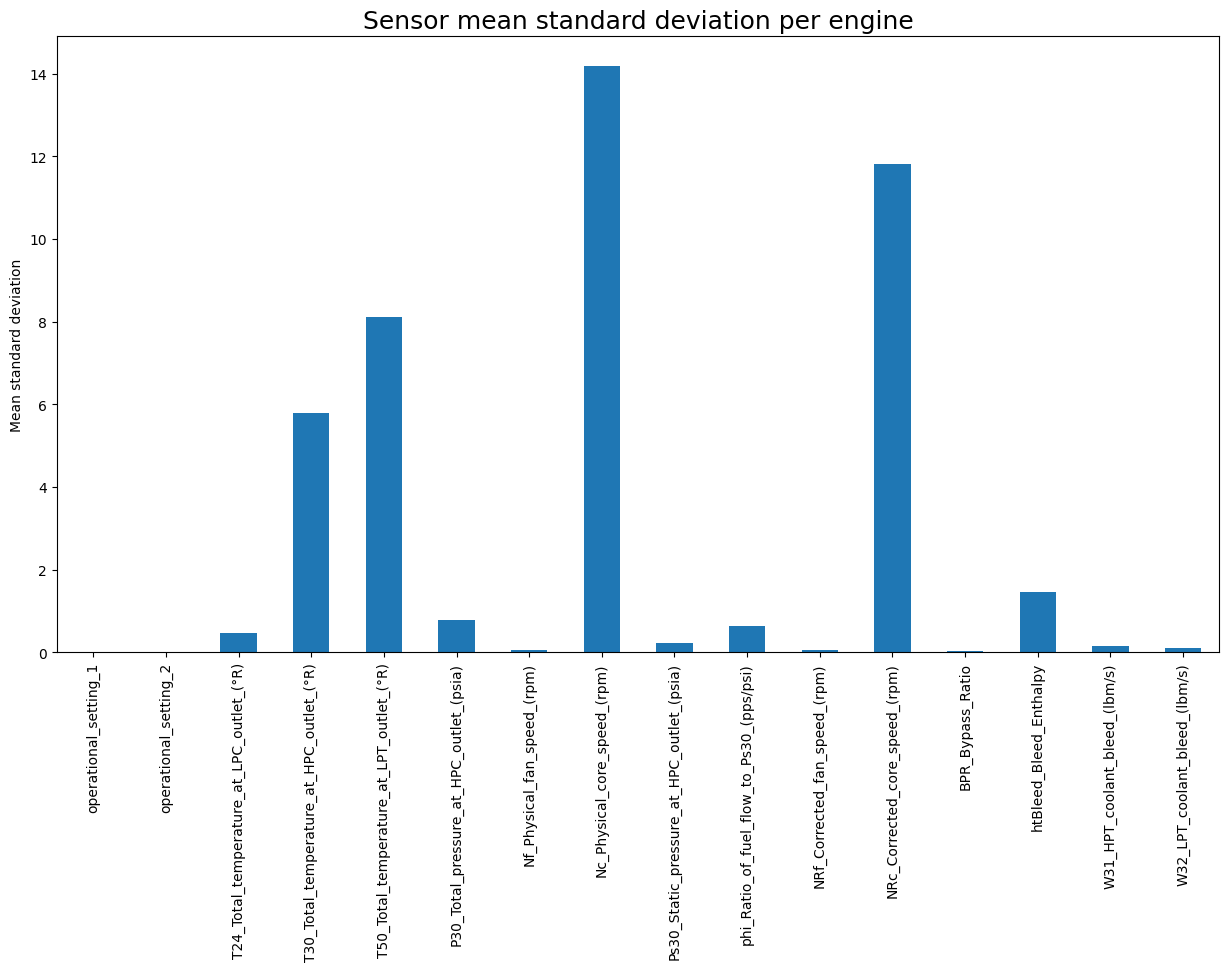

In [30]:
#Checking the mean variability for sensors per engine
std_sensors = train_1.drop(["RUL", "time_(cycles)"], axis=1).groupby("unit_number").std().mean()
ax = std_sensors.plot.bar(figsize=(15,8))
ax.set_title("Sensor mean standard deviation per engine", fontsize=18)
ax.set_ylabel("Mean standard deviation")
plt.show()


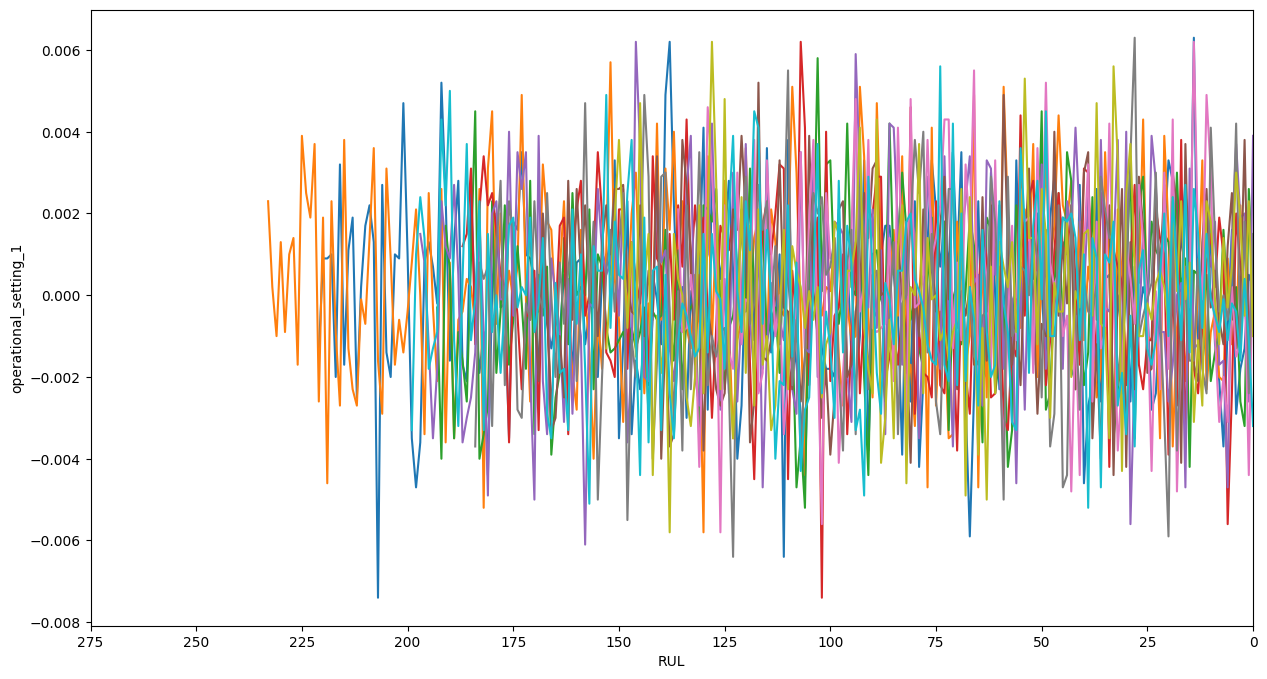

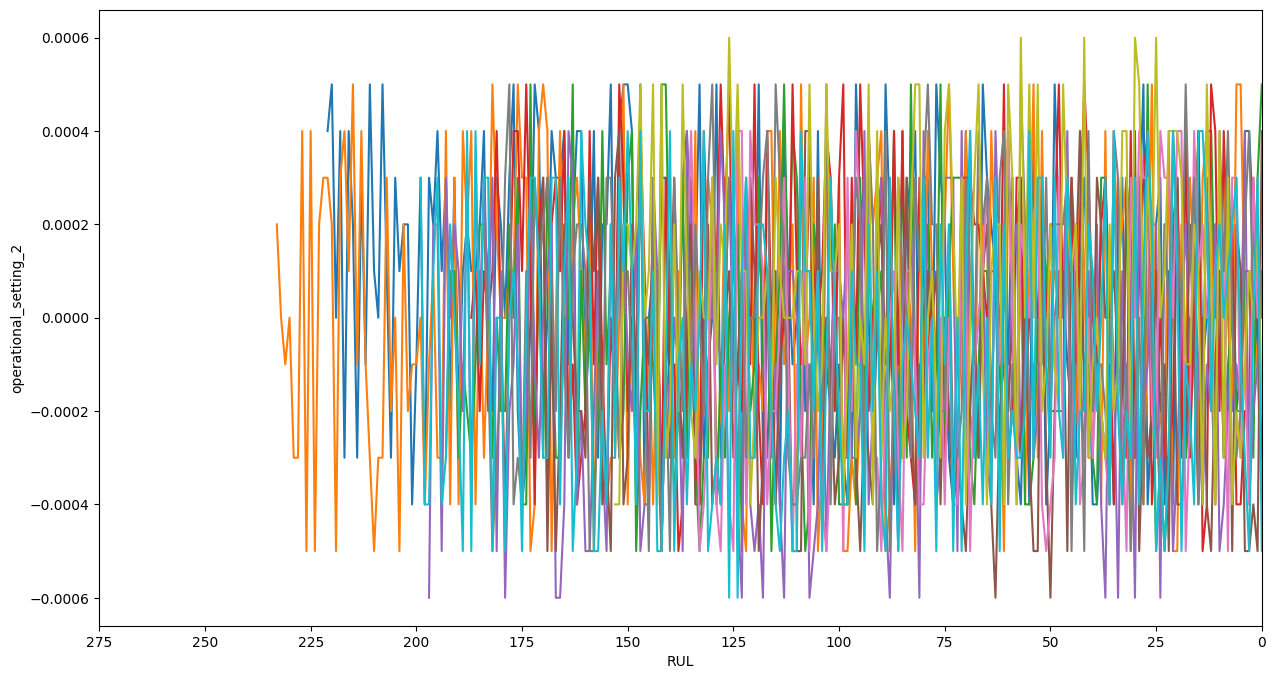

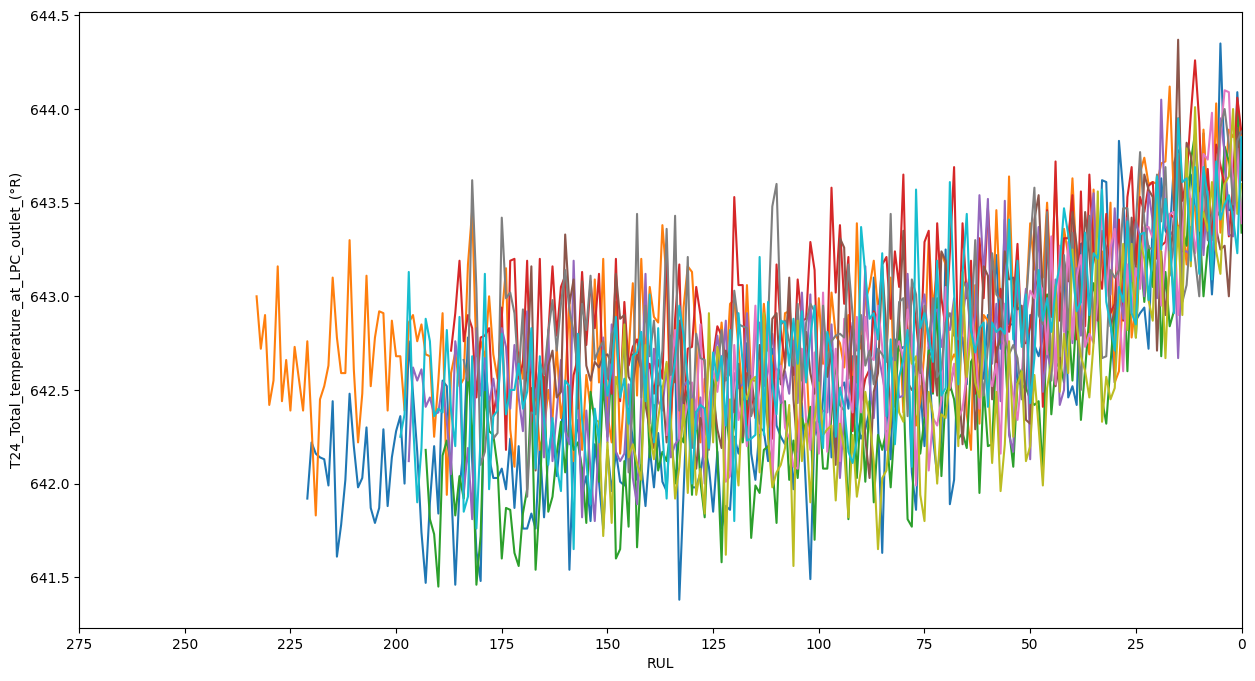

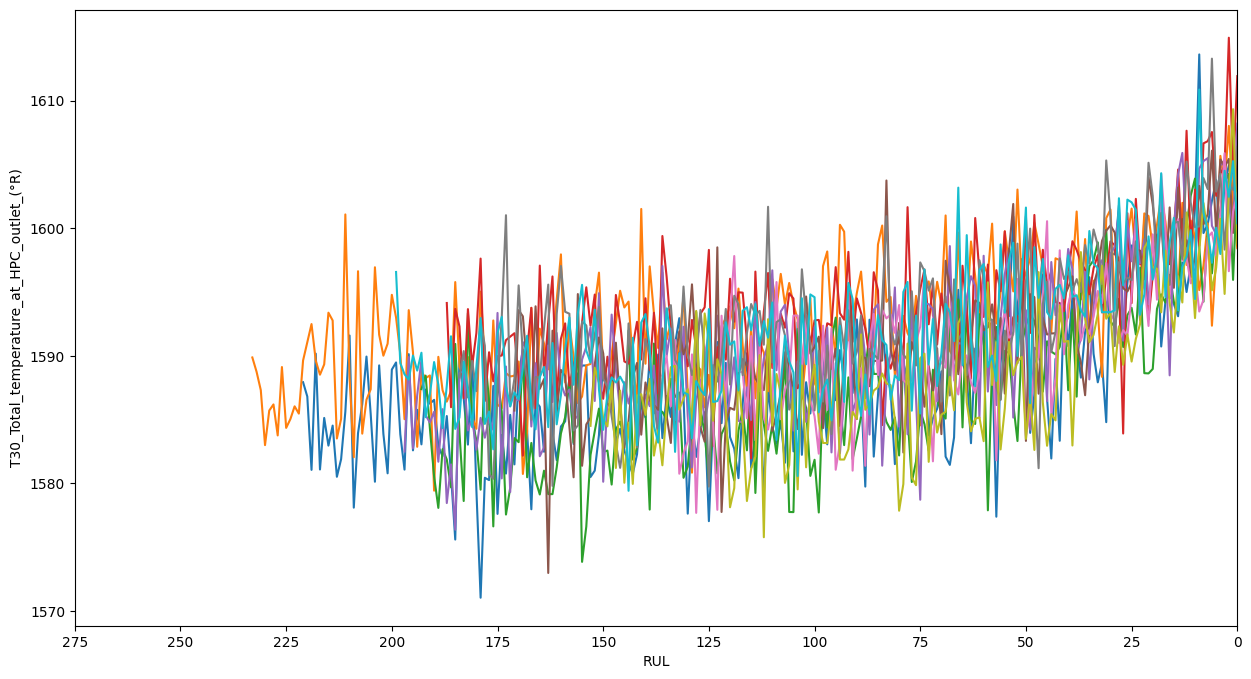

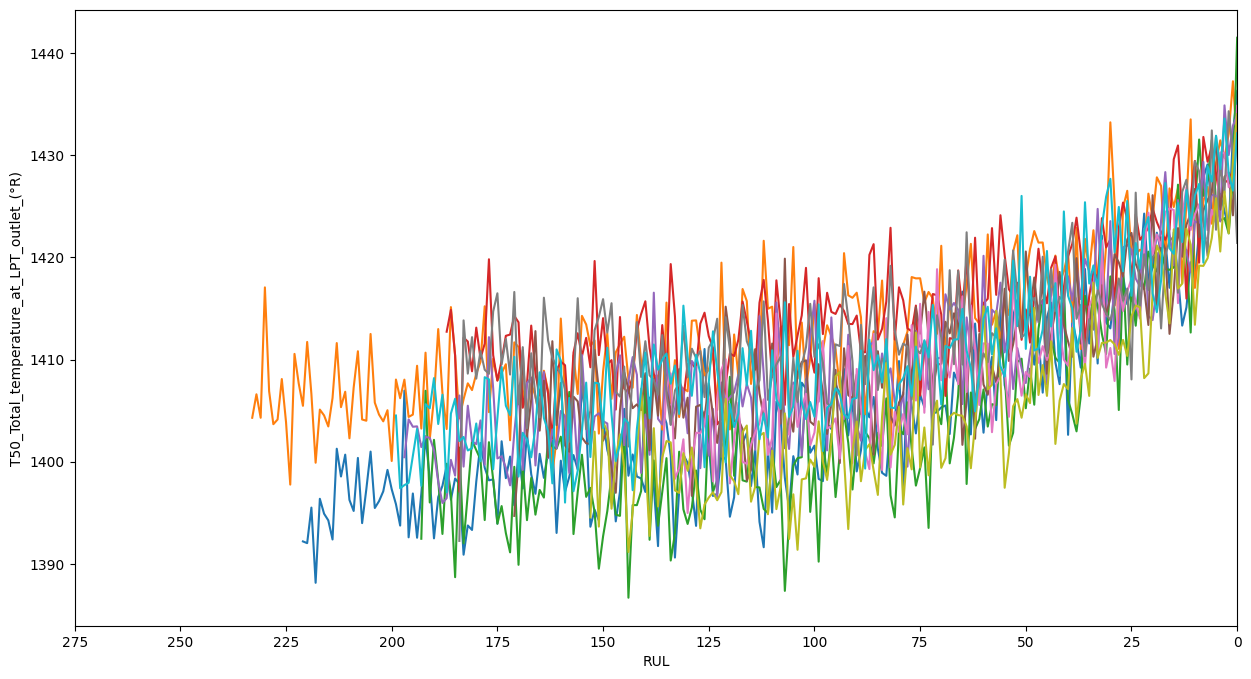

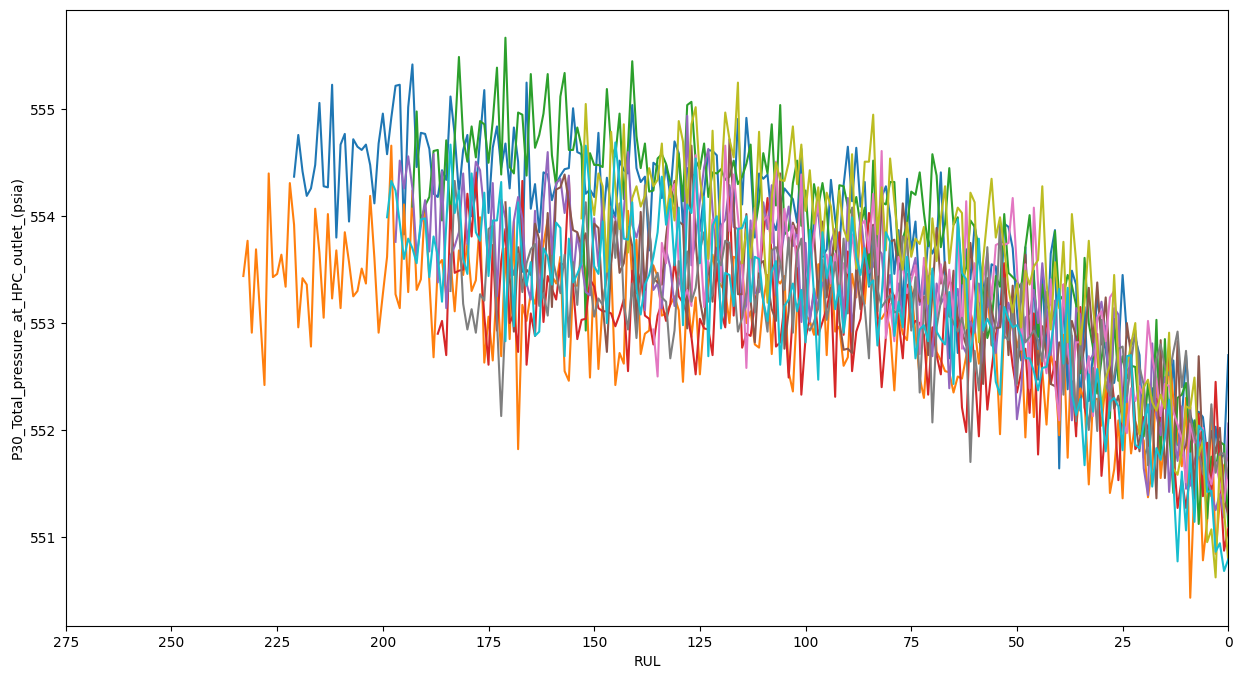

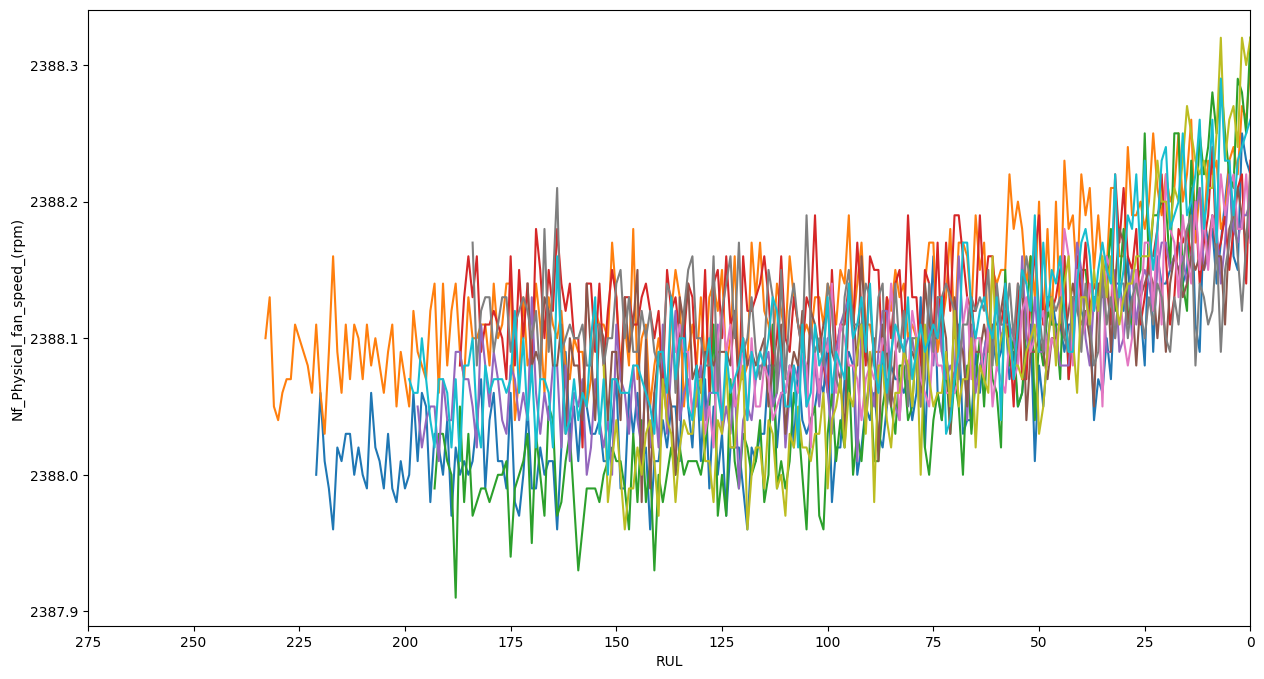

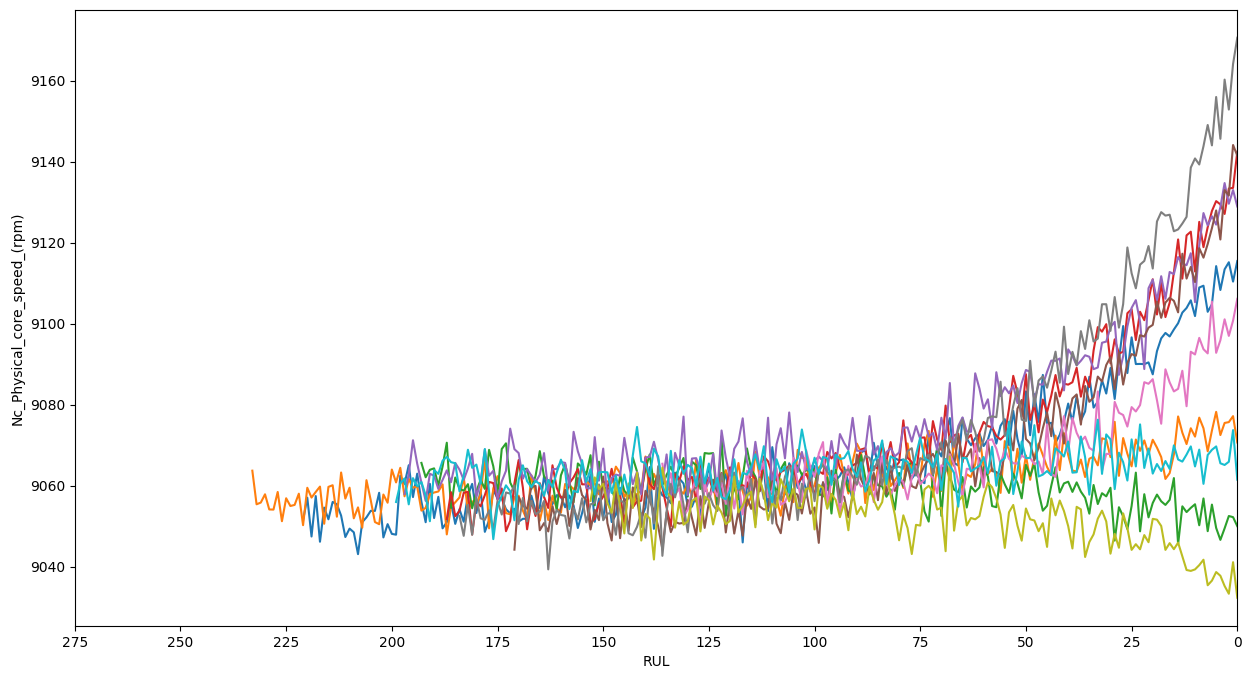

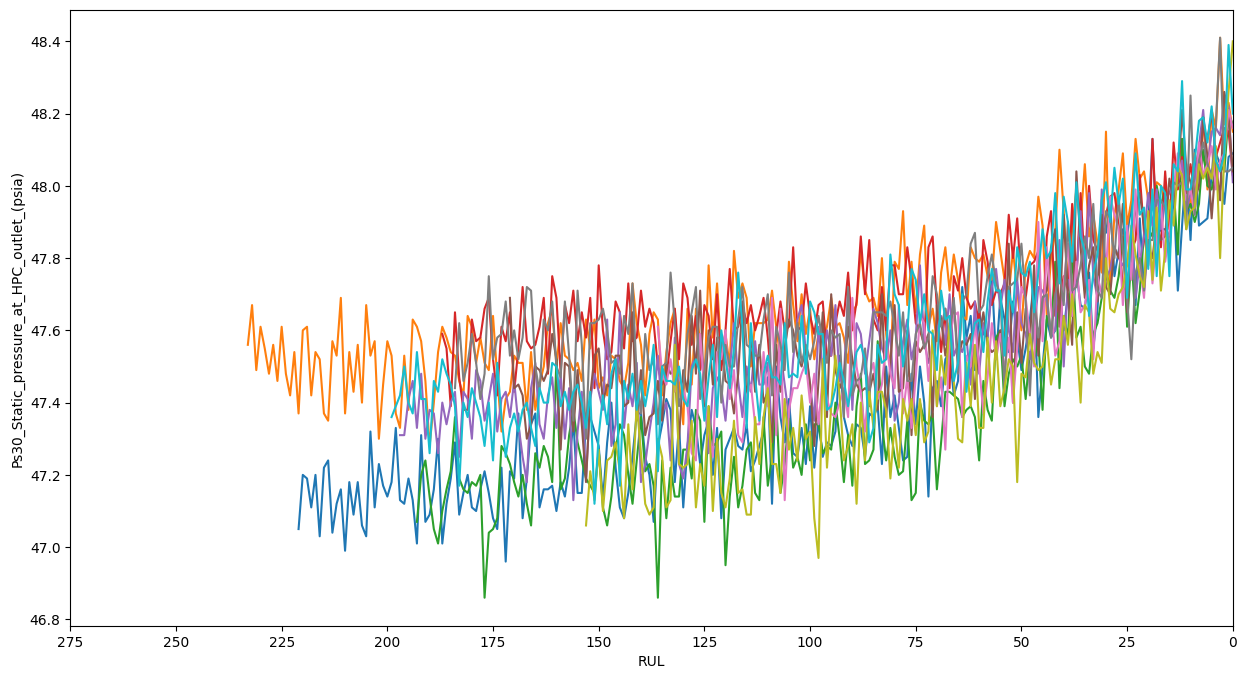

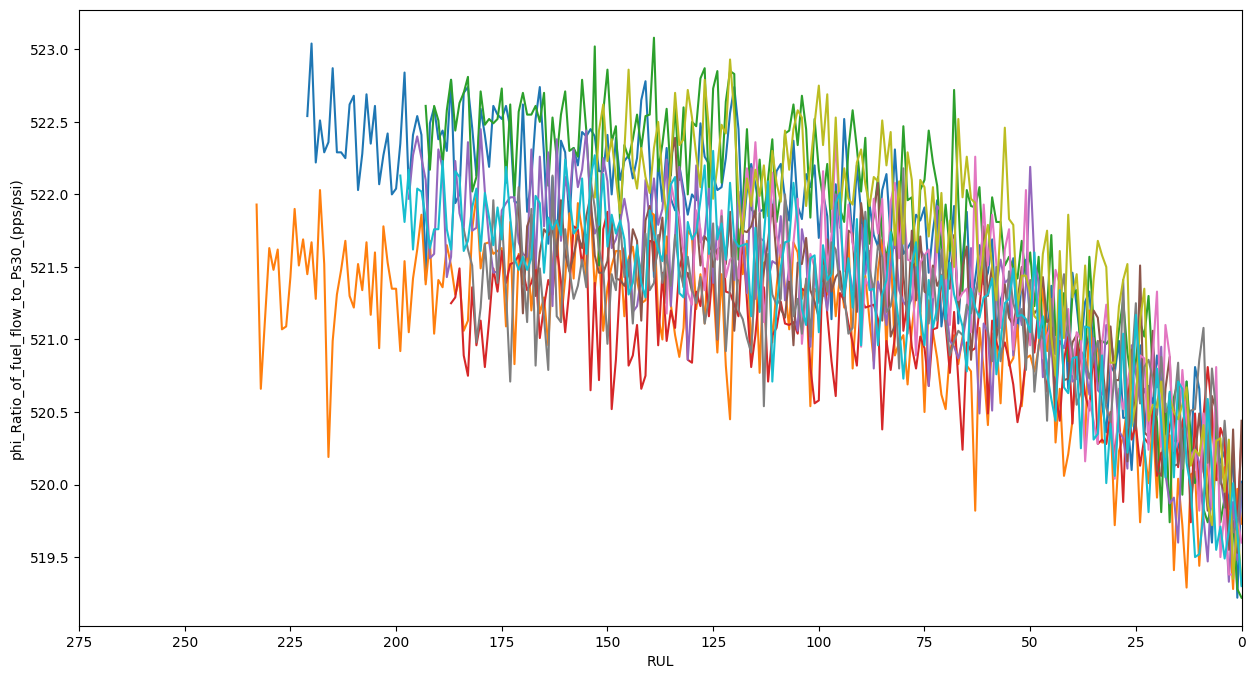

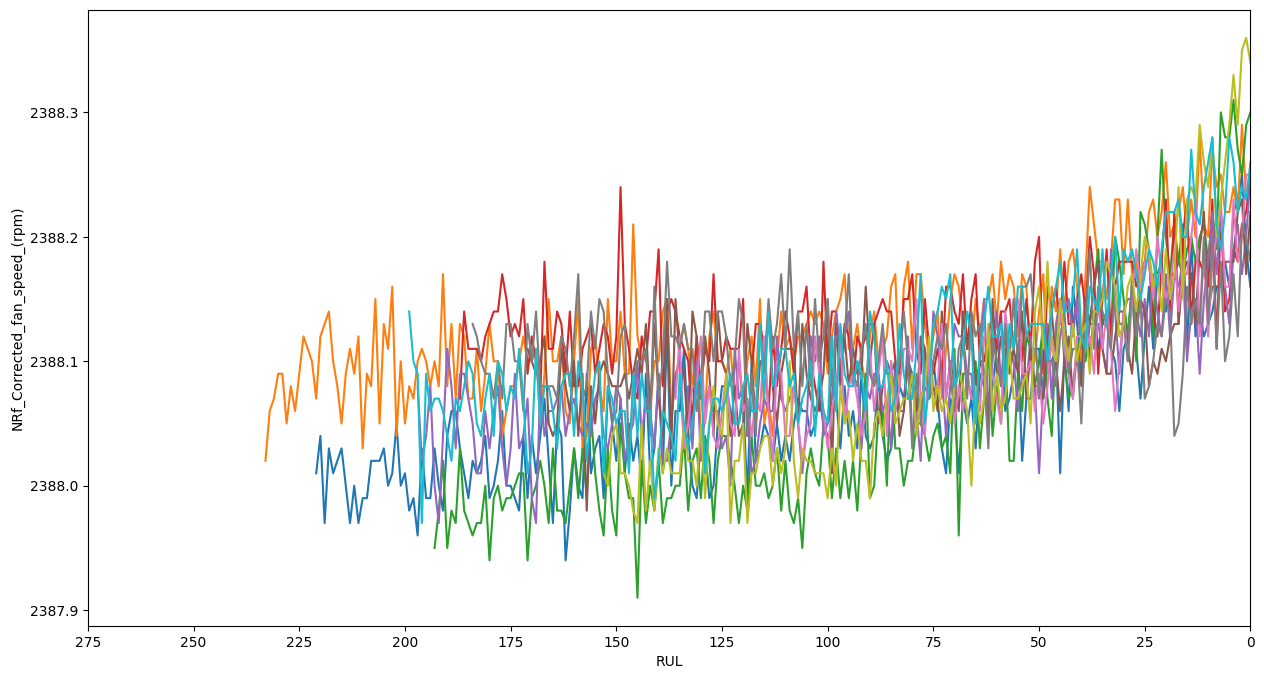

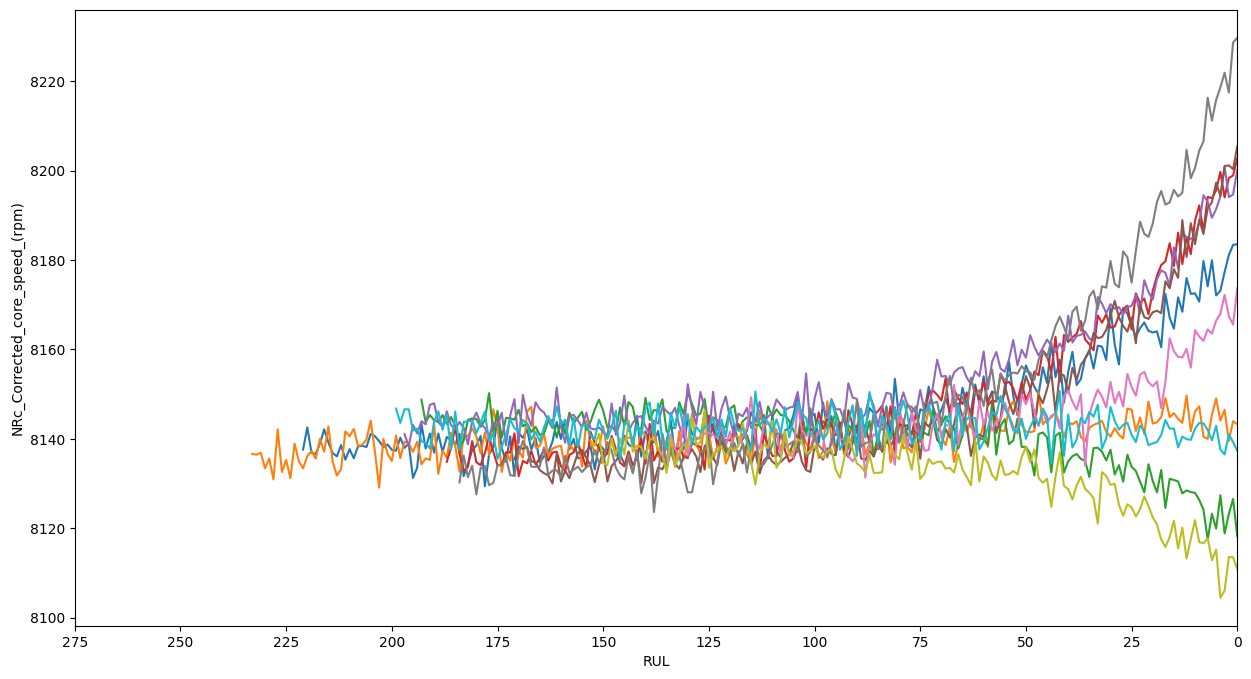

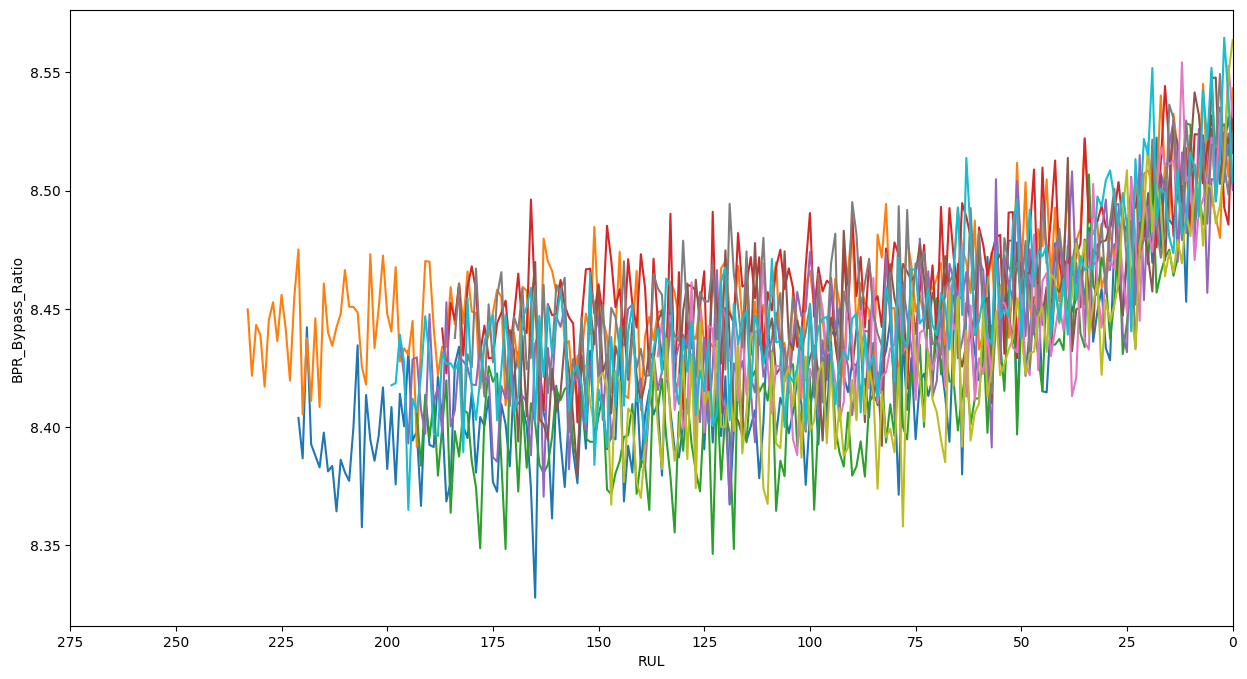

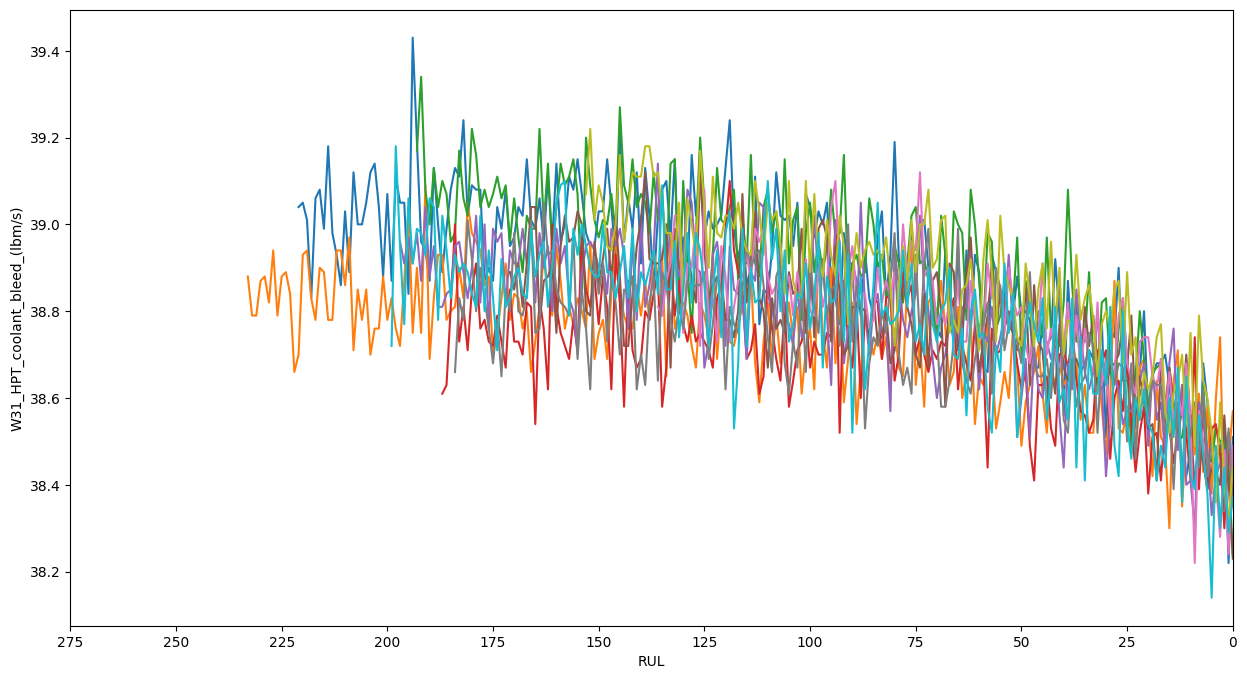

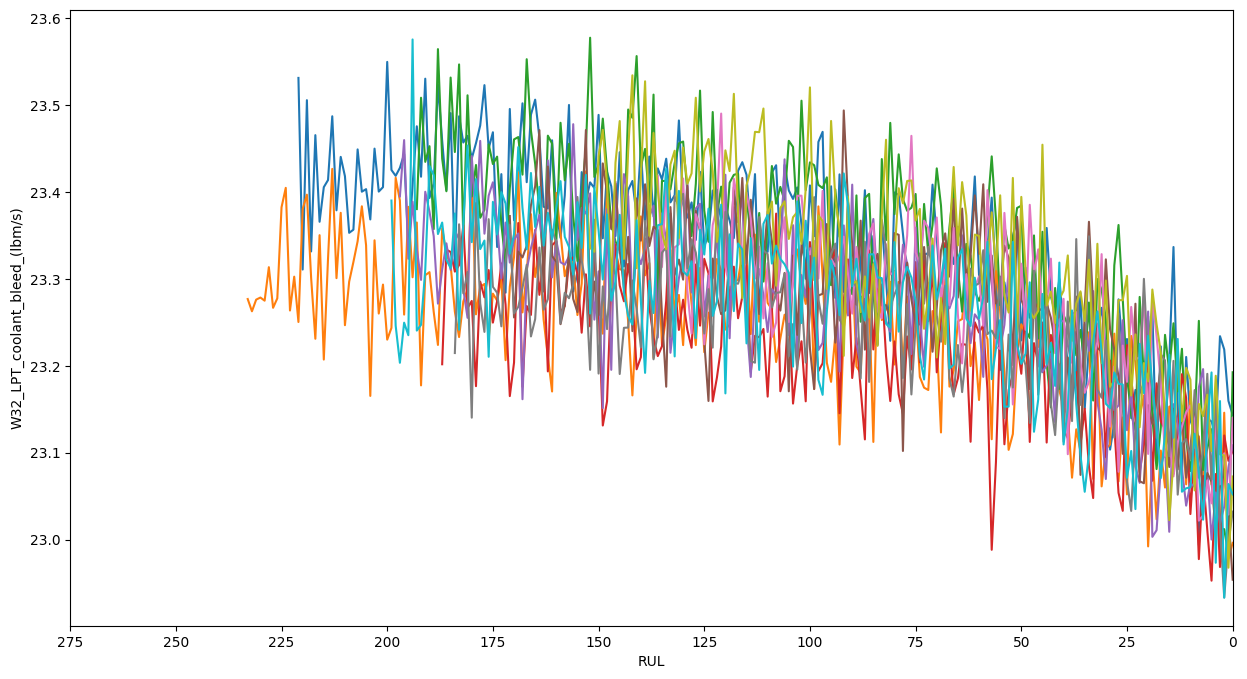

In [31]:
#Plot sensors from 10 out of 100 engines with corresponding RUL on the x-axis
def plot_signal(df, signal_name):
    plt.figure(figsize=(15,8))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i])

    plt.xlim(250, 0)
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(signal_name)
    plt.xlabel('RUL')
    plt.show()

for i in train_1.columns[2:-1]:
    plot_signal(train_1,str(i))

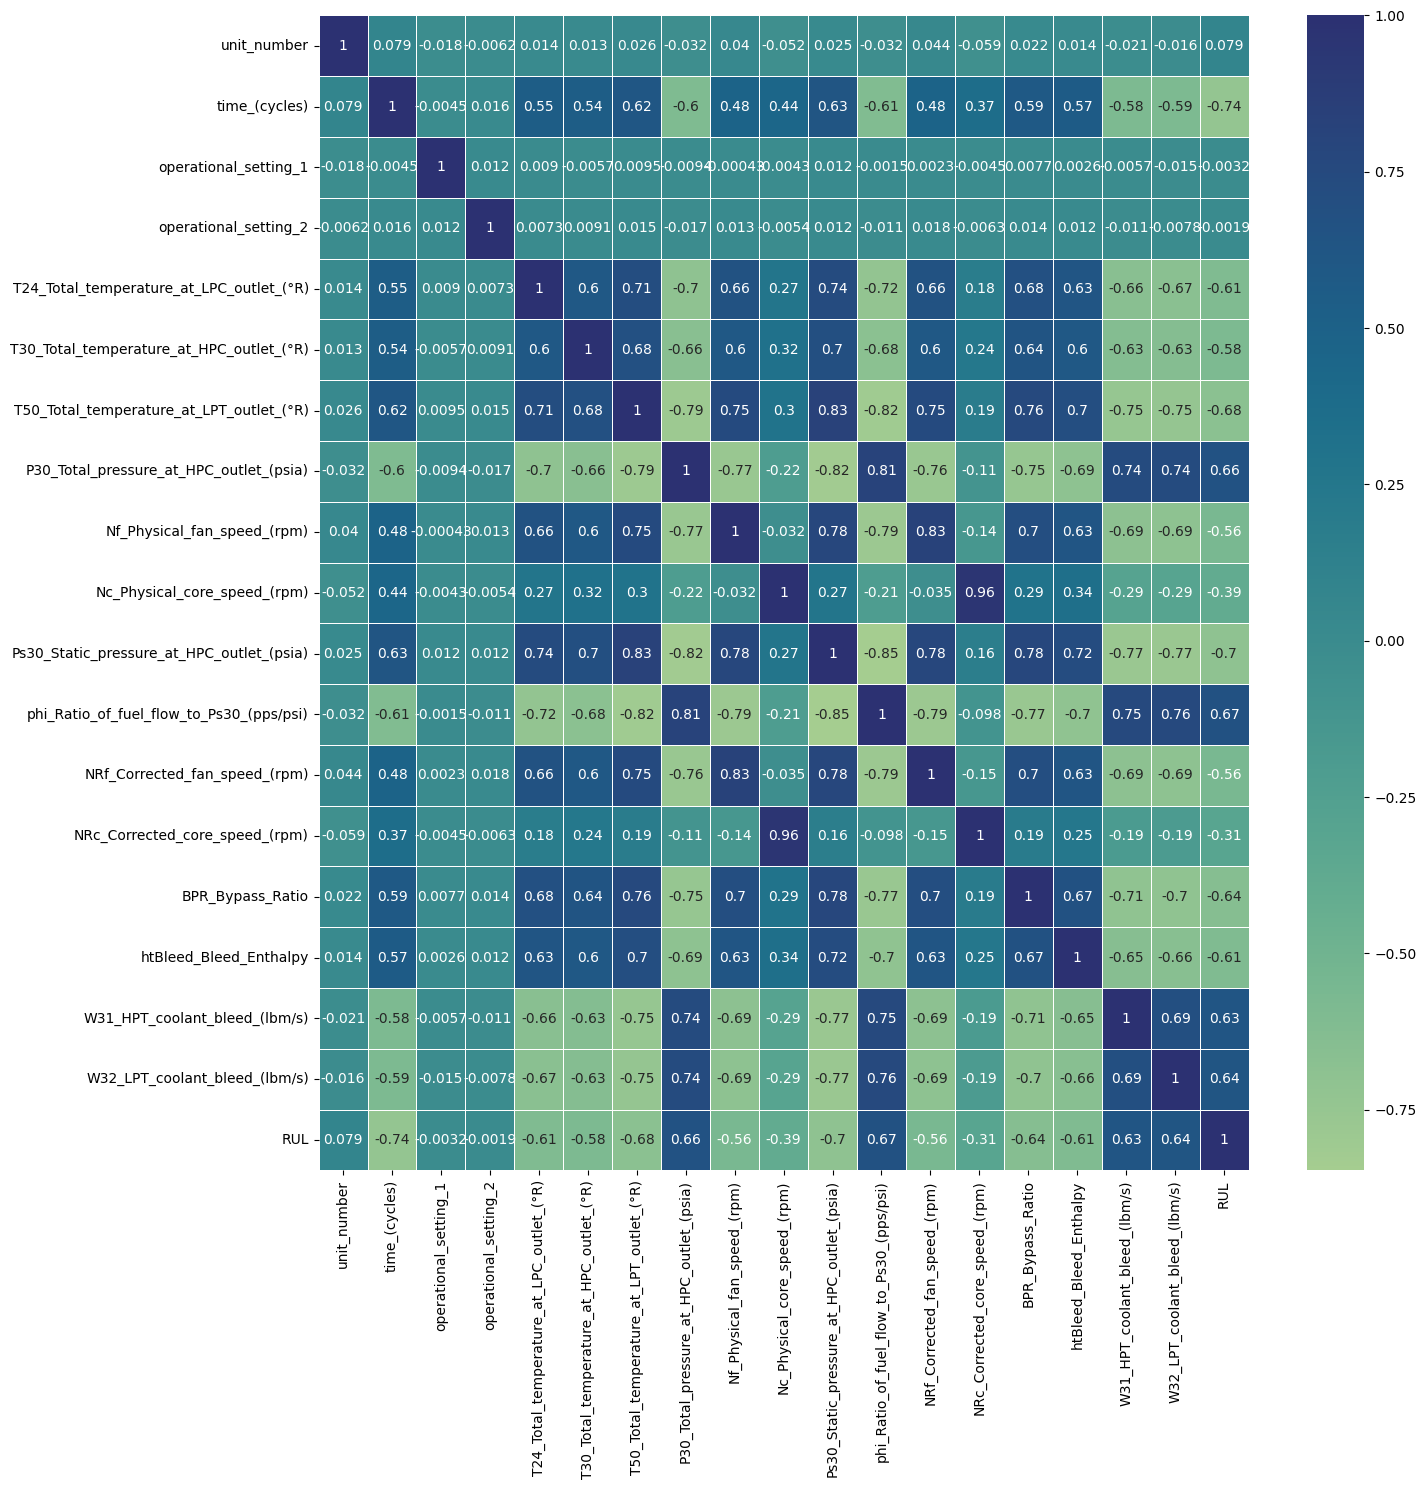

In [32]:

#Correlation matrix
sns.heatmap(train_1.corr(),annot=True,cmap="crest",linewidths=.5)
fig=plt.gcf()
fig.set_size_inches(15,15)
plt.show()


In [33]:
train_1.drop("NRc_Corrected_core_speed_(rpm)", axis=1, inplace=True)
test_1.drop("NRc_Corrected_core_speed_(rpm)", axis=1, inplace=True)

In [35]:
def create_features(df):
    features = pd.DataFrame()
    features['sensor_mean'] = df.iloc[:, 2:].mean(axis=1)
    features['sensor_std'] = df.iloc[:, 2:].std(axis=1)
    return features

train_features = create_features(train_1)
test_features = create_features(test_1)

# Train-Test Split
X = train_features
y = train_1['RUL']  # Assuming RUL is part of the train data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
# Model Building
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Validation RMSE: {rmse}')

# Make Predictions on Test Data
test_predictions = model.predict(test_features)
print(test_predictions)


Validation RMSE: 9.286562875270162
[349.67 349.67 349.67 ... 349.67 349.67 349.67]


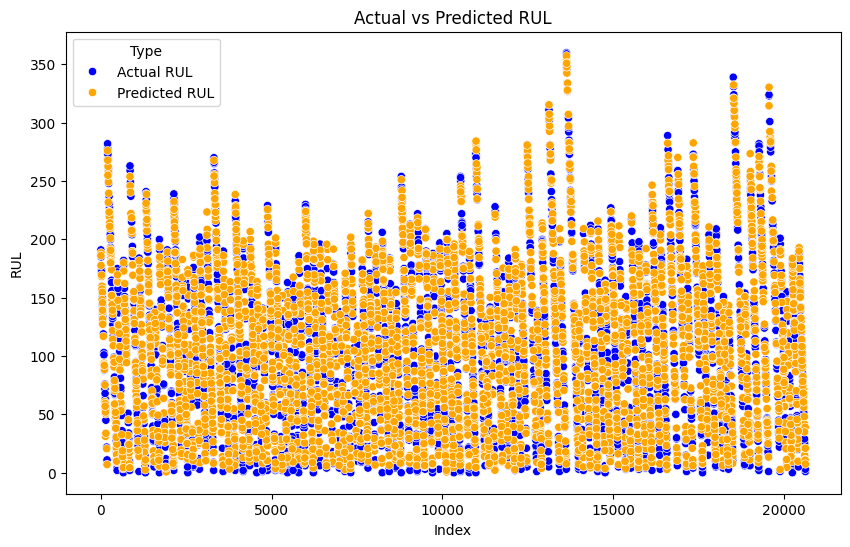

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for actual and predicted RUL
results = pd.DataFrame({
    'Actual RUL': y_val,
    'Predicted RUL': y_pred
})

# Create a melted DataFrame for plotting
results_melted = pd.melt(results.reset_index(), id_vars=['index'], value_vars=['Actual RUL', 'Predicted RUL'])
results_melted.columns = ['index', 'Type', 'RUL']

# Plot actual vs predicted RUL with different colors
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_melted, x='index', y='RUL', hue='Type', palette=['blue', 'orange'])
plt.xlabel('Index')
plt.ylabel('RUL')
plt.title('Actual vs Predicted RUL')
plt.legend(title='Type')
plt.show()


In [42]:
# Define a dictionary to store models and their names
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    results[name] = rmse
    print(f'{name} RMSE: {rmse}')

# Print the results
for name, rmse in results.items():
    print(f'{name}: {rmse}')

# Optionally save the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
joblib.dump(best_model, f'{best_model_name}_model.pkl')
print(f'Best model: {best_model_name} with RMSE: {results[best_model_name]}')

Linear Regression RMSE: 9.3063004776277
Ridge Regression RMSE: 9.30629803613173
Lasso Regression RMSE: 9.306535633874589
Decision Tree RMSE: 11.962160678687528
Random Forest RMSE: 9.286562875270162
Gradient Boosting RMSE: 8.872918028267707
XGBoost RMSE: 8.83688588490915
SVR RMSE: 66.59082909627449
KNN RMSE: 9.235610225872746
Linear Regression: 9.3063004776277
Ridge Regression: 9.30629803613173
Lasso Regression: 9.306535633874589
Decision Tree: 11.962160678687528
Random Forest: 9.286562875270162
Gradient Boosting: 8.872918028267707
XGBoost: 8.83688588490915
SVR: 66.59082909627449
KNN: 9.235610225872746
Best model: XGBoost with RMSE: 8.83688588490915


/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_23902/1253252268.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')


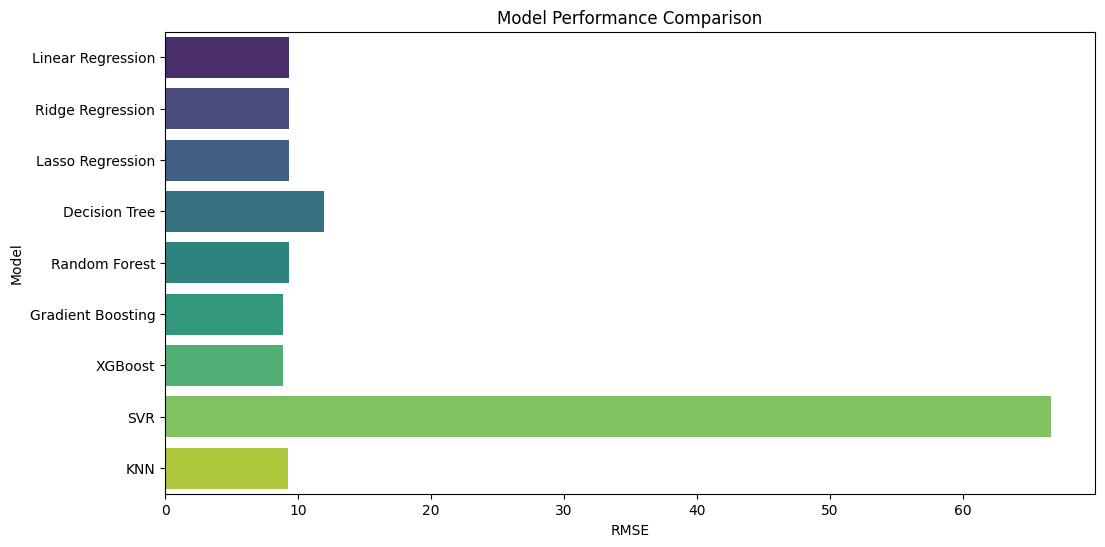

In [43]:
import matplotlib.pyplot as plt

# Convert the results to a DataFrame for easy plotting
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'RMSE'])

# Plot the RMSE values for each model
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Performance Comparison')
plt.show()